<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-07-18 18:26:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  45.7MB/s    in 0.8s    

2023-07-18 18:26:05 (45.7 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Lab 14 - Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

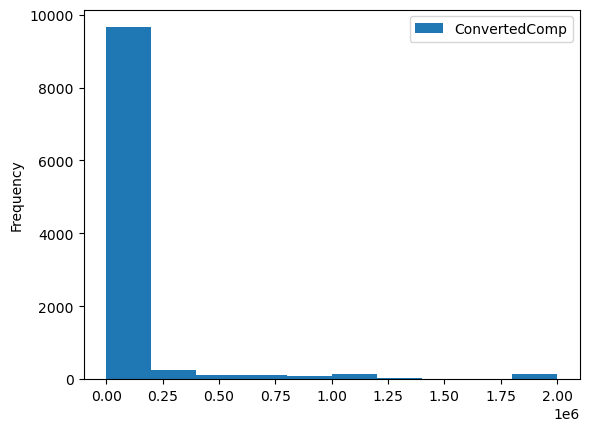

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(kind='hist')

### Lab 15 - Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

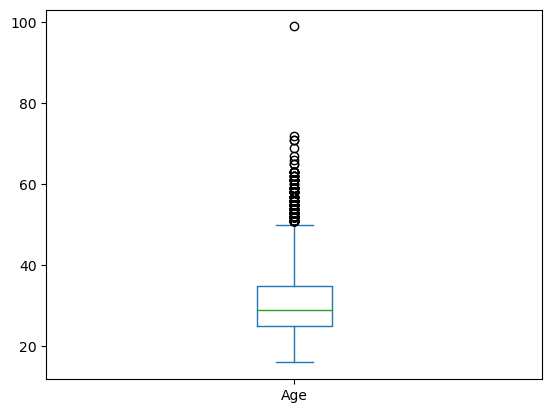

In [9]:
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(kind='box')

## Visualizing relationships in data


### Lab 16 - Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='Age'>

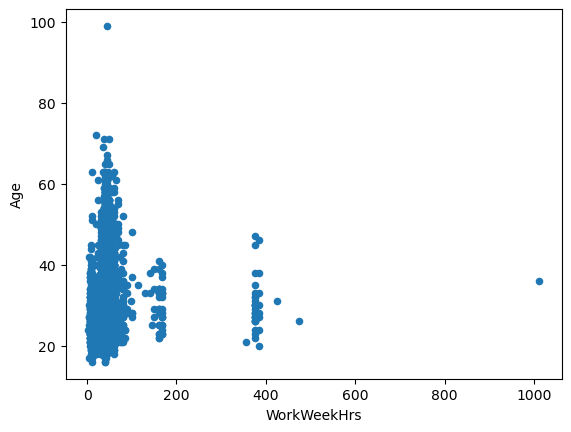

In [10]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(kind='scatter',x='WorkWeekHrs',y='Age')

### Lab 17 - Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

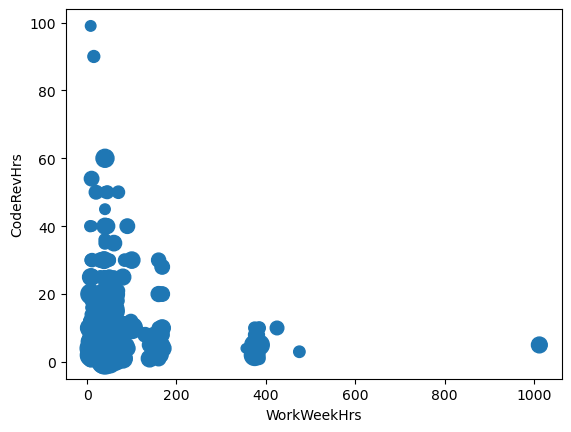

In [11]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot.scatter(x='WorkWeekHrs',y='CodeRevHrs',s=df['Age']**2/10)

## Visualizing composition of data


### Lab 18 - Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<AxesSubplot:ylabel='DatabaseDesireNextYear'>

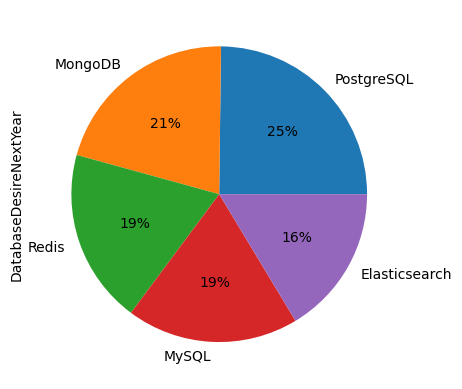

In [12]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
new_df=df['DatabaseDesireNextYear'].value_counts().head(5)
new_df.plot(kind="pie", autopct='%1.0f%%')

In the list of popular languages respondents wish to learn next year, what is the rank of python?

In [13]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df['LanguageDesireNextYear'].value_counts().rank(ascending=False)

JavaScript                1.0
HTML/CSS                  2.0
Python                    3.0
SQL                       4.0
TypeScript                5.0
C#                        6.0
Bash/Shell/PowerShell     7.0
Java                      8.0
Go                        9.0
Kotlin                   10.0
C++                      11.0
Rust                     12.0
PHP                      13.0
WebAssembly              14.0
Swift                    15.0
Ruby                     16.0
C                        17.0
Scala                    18.0
R                        19.0
Other(s):                20.0
F#                       21.0
Elixir                   22.0
Dart                     23.0
Clojure                  24.0
Assembly                 25.0
Objective-C              26.5
Erlang                   26.5
VBA                      28.0
Name: LanguageDesireNextYear, dtype: float64

How many respondents indicated they currently work with 'SQL'?

In [14]:
QUERY = """
SELECT *
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'SQL'
"""
df = pd.read_sql_query(QUERY,conn)
len(df['LanguageWorkedWith'])

7106

How many respondents indicated they currently work with 'MySQL', only?

In [15]:
QUERY="""
SELECT DatabaseWorkedWith
FROM DatabaseWorkedWith
GROUP BY Respondent having count(*)=1 AND DatabaseWorkedWith='MySQL'
"""
df=pd.read_sql_query(QUERY,conn)
len(df)

474

In [16]:
from timeit import default_timer as timer

How many respondents indicated they currently work with 'MySQL', only?

SQL based method

In [17]:
start = timer()
QUERY="""
SELECT DatabaseWorkedWith
FROM DatabaseWorkedWith
GROUP BY Respondent having count(*)=1 AND DatabaseWorkedWith='MySQL'
"""
df=pd.read_sql_query(QUERY,conn)
len(df)
end = timer()
print("The time taken is",end - start, "seconds")

The time taken is 0.016592571999353822 seconds


Pandas based method

In [18]:
start = timer()
QUERY="""
SELECT DatabaseWorkedWith, Respondent
FROM DatabaseWorkedWith
"""
df=pd.read_sql_query(QUERY,conn)
new_df=df.groupby('Respondent').filter(lambda x : len(x)<2)
len(new_df.loc[new_df['DatabaseWorkedWith']=='MySQL'])
end = timer()
print("The time taken is",end - start, "seconds")

The time taken is 0.18062179399930756 seconds


### Lab 19 - Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

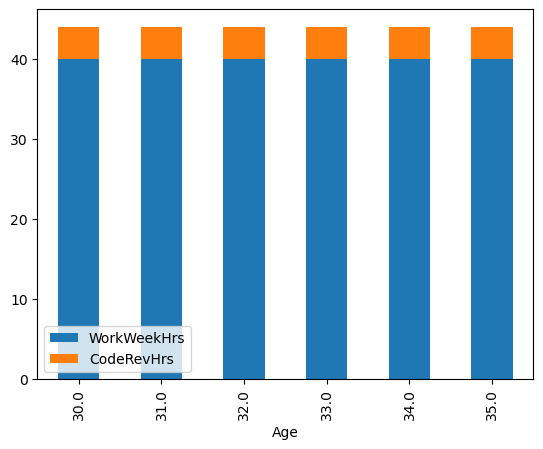

In [19]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35
"""

df = pd.read_sql_query(QUERY,conn)
df.groupby('Age').median().plot.bar(stacked=True)

## Visualizing comparison of data


### Lab 20 - Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

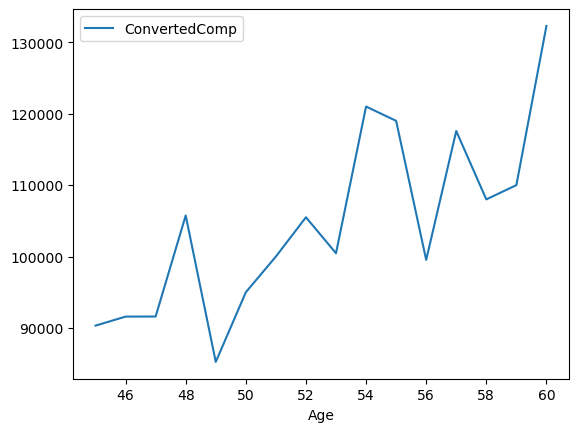

In [20]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60
"""

df = pd.read_sql_query(QUERY,conn)
df.groupby('Age').median().plot()

Majority of the survey respondents are what type of developer?

In [21]:
QUERY = """
SELECT *
FROM DevType
"""
df = pd.read_sql_query(QUERY,conn)
df['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

What is the relationship between median `ConvertedComp` for all ages from 25 to 30?

<AxesSubplot:xlabel='Age'>

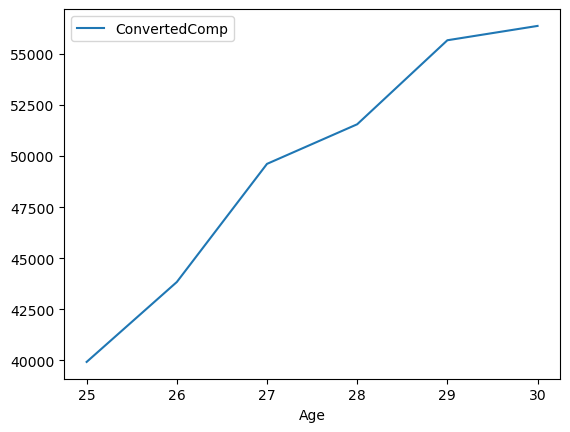

In [22]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age >= 25 AND Age <= 30
"""

df = pd.read_sql_query(QUERY,conn)
df.groupby('Age').median().plot()

### Lab 21 - Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

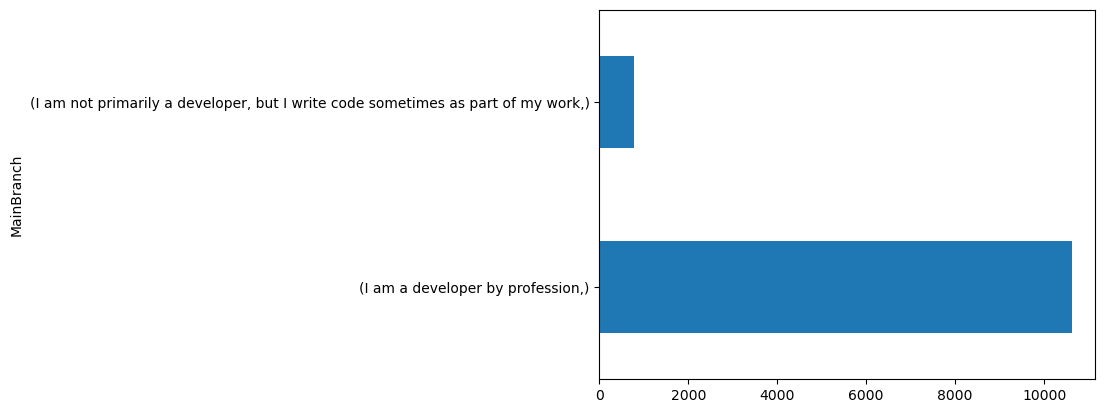

In [23]:
QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
new_df=df.value_counts()
new_df.plot.barh()

Close the database connection.


In [24]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
